# K-Nearest Neighbors, Decision Tree, Random Forest, and Gradient Boosted Regression


- K-nearest neighbors and decision tree can be used for classification and regression
- they can handle nonlinearity well and no assumptions regarding the Gaussian distribution of features need to be made
- the value of _k_, the maximal depth of decision tree can be adjusted to avoid overfitting

In this chapter, we will cover the following
- key concepts for k-nearest neighbors regression
- k-nearest neighbors regression
- key concepts for decision trees and random forest regression
- decision tree and random forest regression
- using gradient boosted regression

## Q/A

<details>
<summary>How does KNN works</summary>

### How does KNN works

K-nearest neighbors (KNN) is a machine learning algorithm that can be used for both classification and regression tasks. It works by finding the k most similar training examples to a new data point, and then using the labels of those training examples to predict the label of the new data point.

In the context of text classification, KNN can be used to classify words into different categories. For example, you could use KNN to classify words into nouns, verbs, adjectives, and adverbs.

To use KNN for text classification, you first need to train the algorithm on a dataset of words that have already been classified. This dataset is called the training set. Once the algorithm has been trained, you can use it to classify new words.

To classify a new word, you first need to find the k most similar words in the training set. This can be done using a variety of distance metrics, such as the Euclidean distance or the cosine similarity. Once you have found the k most similar words, you can use the labels of those words to predict the label of the new word.

For example, let's say you want to classify the word "dog". You could use KNN to find the k most similar words in the training set. Let's say that the k most similar words are "cat", "pet", "animal", and "mammal". All of these words are nouns, so KNN would predict that the word "dog" is also a noun.

KNN is a simple and effective machine learning algorithm that can be used for a variety of text classification tasks. It is a good choice for tasks where you do not have a lot of training data, or where the training data is noisy.
    </details>

### How does the value of `k` affects KNN algorithm?
The value of k in the KNN algorithm is the number of nearest neighbors that are used to predict the label of a new data point. The value of k can have a significant impact on the performance of the KNN algorithm.

If the value of k is too small, the KNN algorithm may be overfit to the training data. This means that the algorithm will perform well on the training data, but it will not perform well on new data.

If the value of k is too large, the KNN algorithm may be underfit to the training data. This means that the algorithm will not perform well on either the training data or new data.

The optimal value of k will depend on the specific dataset that is being used. In general, it is a good idea to start with a small value of k and then increase the value of k until the performance of the KNN algorithm starts to degrade.

Here are some additional tips for choosing the value of k:

- Use a cross-validation set to evaluate the performance of the KNN algorithm for different values of k.
- Use a grid search to find the optimal value of k.
- Use a holdout set to evaluate the performance of the KNN algorithm on new data.

Ultimately, the best way to choose the value of k will depend on the specific needs of your application.

### What are the similarity measures that are used for KNN?

There are many similarity measures that can be used for KNN. Some of the most common similarity measures include:

- Euclidean distance: This is the most common similarity measure. It measures the distance between two points in a Euclidean space.
- Manhattan distance: This similarity measure measures the distance between two points in a Manhattan space.
- Minkowski distance: This similarity measure is a generalization of the Euclidean and Manhattan distances. It allows for different weights to be applied to each dimension.
- Cosine similarity: This similarity measure measures the cosine of the angle between two vectors. It is often used for text classification tasks.
- Jaccard similarity: This similarity measure measures the intersection of two sets divided by the union of the two sets. It is often used for document similarity tasks.

The choice of similarity measure will depend on the specific data that is being used. In general, it is a good idea to experiment with different similarity measures to see which one produces the best results.

### How to pick the best value of `k`

There is no one-size-fits-all answer to this question, as the optimal value of k will vary depending on the specific dataset and application. However, there are a few general guidelines that can be followed:

- Start with a small value of k. A small value of k will make the KNN algorithm more sensitive to noise in the data, but it will also make the algorithm less likely to overfit the training data.
- Increase the value of k until the performance of the algorithm starts to plateau. Once the performance of the algorithm starts to plateau, increasing the value of k will not improve the performance of the algorithm.
- Use a cross-validation set to evaluate the performance of the algorithm for different values of k. A cross-validation set is a set of data that is held out from the training set and used to evaluate the performance of the algorithm. Using a cross-validation set will help you to choose the value of k that produces the best results on unseen data.

Here are some additional tips for choosing the value of k:

- Use a grid search to find the optimal value of k. A grid search is a technique that can be used to find the optimal values of hyperparameters, such as the value of k.
- Use a holdout set to evaluate the performance of the algorithm on new data. A holdout set is a set of data that is held out from the training set and used to evaluate the performance of the algorithm on new data. Using a holdout set will help you to get a more accurate estimate of the performance of the algorithm on new data.

Ultimately, the best way to choose the value of k will depend on the specific needs of your application.

## K-nearest neighbors regression


We will use KNN to build a model of the ratio of female to male incomes at the level of country. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from data.load import load_un_income
from preprocfunc import OutlierTrans

In [2]:
df = load_un_income()
df.columns

Index(['gdirank', 'genderdev', 'femalehumandevelopment',
       'malehumandevelopment', 'femalelifeexpectancy', 'malelifeexpectancy',
       'femaleexpectededucation', 'maleexpectededucation',
       'femaleyearseducation', 'maleyearseducation', 'femaleincomepercapita',
       'maleincomepercapita', 'giirank', 'genderinequality',
       'maternalmortality', 'adolescentbirthrate', 'femaleperparliament',
       'femalepersecondaryeducation', 'malepersecondaryeducation',
       'femalelaborforceparticipation', 'malelaborforceparticipation',
       'hdirank', 'hdi', 'lifeexpectancy', 'expectededucation', 'education',
       'incomepercapita', 'incomerank', 'incomeratio', 'educratio',
       'laborforcepartratio', 'humandevratio'],
      dtype='object')

In [3]:
num_cols = [
    "educratio",
    "laborforcepartratio",
    "humandevratio",
    "genderinequality",
    "maternalmortality",
    "adolescentbirthrate",
    "femaleperparliament",
    "incomepercapita",
]

gap_sub = df[["incomeratio"] + num_cols]
gap_sub.head()

,incomeratio,educratio,laborforcepartratio,humandevratio,genderinequality,maternalmortality,adolescentbirthrate,femaleperparliament,incomepercapita
country,,,,,,,,,
Norway,0.784621,1.016000,0.890830,0.995763,0.067,4.0,7.8,39.6,64992
Australia,0.661665,1.015504,0.818942,0.975661,0.110,6.0,12.1,30.5,42261
Switzerland,0.638881,0.877863,0.825100,0.950265,0.028,6.0,1.9,28.5,56431
Denmark,0.704448,1.007874,0.884036,0.976445,0.048,5.0,5.1,38.0,44025
Netherlands,0.478578,0.950820,0.828612,0.946978,0.062,6.0,6.2,36.9,45435


Let's look at some descriptive statistics

In [4]:
gap_sub.agg(["count", "min", "median", "max"]).T

,count,min,median,max
incomeratio,177.0,0.156802,0.604965,0.927258
educratio,169.0,0.235294,0.931818,1.348485
laborforcepartratio,177.0,0.185695,0.753467,1.038037
humandevratio,161.0,0.600733,0.949728,1.030708
genderinequality,155.0,0.016000,0.385000,0.744000
maternalmortality,174.0,1.000000,60.000000,1100.000000
adolescentbirthrate,177.0,0.600000,40.900000,204.800000
femaleperparliament,174.0,0.000000,19.350000,57.500000
incomepercapita,177.0,581.000000,10512.000000,123124.000000


^ We have 177 observations with our target variable, `incomeratio`. 

A couple of features, `humandevratio` and `genderinequality` have more than 15 missing values. We will need to impute some reasonable values there.

We will also need to do some scaling as some features have very different ranges than others, from `incomeratio` and `incomepercapita` on one end to `educratio` and `humandevratio` on the other.

In [5]:
corr_matrix = gap_sub.corr(method="pearson")
corr_matrix

,incomeratio,educratio,laborforcepartratio,humandevratio,genderinequality,maternalmortality,adolescentbirthrate,femaleperparliament,incomepercapita
incomeratio,1.000000,0.087804,0.932622,0.401849,-0.105435,0.244453,0.181539,0.217681,-0.075852
educratio,0.087804,1.000000,0.065784,0.869849,-0.566815,-0.635926,-0.479240,0.118240,0.427663
laborforcepartratio,0.932622,0.065784,1.000000,0.360905,-0.157266,0.250906,0.157855,0.237262,-0.014077
humandevratio,0.401849,0.869849,0.360905,1.000000,-0.654029,-0.651312,-0.505989,0.206926,0.423466
genderinequality,-0.105435,-0.566815,-0.157266,-0.654029,1.000000,0.723024,0.791822,-0.361259,-0.616109
maternalmortality,0.244453,-0.635926,0.250906,-0.651312,0.723024,1.000000,0.764804,-0.085453,-0.494633
adolescentbirthrate,0.181539,-0.479240,0.157855,-0.505989,0.791822,0.764804,1.000000,-0.056025,-0.545689
femaleperparliament,0.217681,0.118240,0.237262,0.206926,-0.361259,-0.085453,-0.056025,1.000000,0.108014
incomepercapita,-0.075852,0.427663,-0.014077,0.423466,-0.616109,-0.494633,-0.545689,0.108014,1.000000


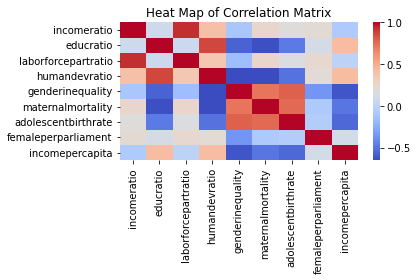

In [6]:
sns.heatmap(
    corr_matrix,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns,
    cmap="coolwarm",
)
plt.title("Heat Map of Correlation Matrix")
plt.tight_layout()

Setup training and testing DataFrames:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    gap_sub[num_cols], gap_sub[["incomeratio"]], test_size=0.2, random_state=0
)

We will use linear regression for our feature selection, but we can choose any algorithm that will return feature importance values.

We will set the feature importance threshold to 80% of the mean feature importance.

In [8]:
feature_sel = SelectFromModel(LinearRegression(), threshold="0.8 * mean")

knn_reg = KNeighborsRegressor()

pipe1 = make_pipeline(
    OutlierTrans(3),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    feature_sel,
    knn_reg,
)

We will do grid search to find the best parameters. We only find values for `k` from 3 to 19, skipping even numbers.

We also want the grid search to find the best distance measure - Euclidean, Manhattan, or Minkowski:

In [9]:
knn_reg_params = {
    "kneighborsregressor__n_neighbors": np.arange(3, 21, 2),
    "kneighborsregressor__metric": ["euclidean", "manhattan", "minkowski"],
}

In [10]:
rs = RandomizedSearchCV(
    pipe1,
    knn_reg_params,
    cv=4,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    random_state=1,
)
rs.fit(X_train, y_train)

rs.best_params_

{'kneighborsregressor__n_neighbors': 11,
 'kneighborsregressor__metric': 'manhattan'}

In [11]:
rs.best_score_

-0.05419731104389228

^ These results suggest that the best hyperparameter values are 11 for `k` for KNN and Manhattan for the distance metric.

The best model has a negative mean squared error of -0.05. This is fairly decent, given the small sample size. It is less than 10% of the median value of `incomeratio`, which is 0.6.

To see the features that weere selected:

In [12]:
rs.best_estimator_["selectfrommodel"].get_feature_names_out(num_cols)

array(['laborforcepartratio', 'humandevratio'], dtype=object)

^ Only two features were selected.

To see the performance of other models:

In [13]:
results = (
    pd.DataFrame(rs.cv_results_["mean_test_score"], columns=["meanscore"])
    .join(pd.DataFrame(rs.cv_results_["params"]))
    .sort_values(["meanscore"], ascending=False)
)
results.head(3).T

,13,1,3
meanscore,-0.054197,-0.054811,-0.054918
kneighborsregressor__n_neighbors,11,13,9
kneighborsregressor__metric,manhattan,manhattan,euclidean


^ There is a model that uses `euclidean` distance that performs nearly as well as the best model.

In [14]:
pred = rs.predict(X_test)
pred_df = (
    pd.DataFrame(pred, columns=["prediction"], index=X_test.index)
    .join(X_test)
    .join(y_test)
)
pred_df["resid"] = pred_df.incomeratio - pred_df.prediction
pred_df.resid.agg(["mean", "median", "skew", "kurtosis"])

mean       -0.009897
median     -0.009718
skew       -0.606682
kurtosis    0.233874
Name: resid, dtype: float64

^ The residuals are nicely balanced around 0. There is a little bit of negative skew but that's not bad either. Tehre is low kurtosis

Let's plot the residual.

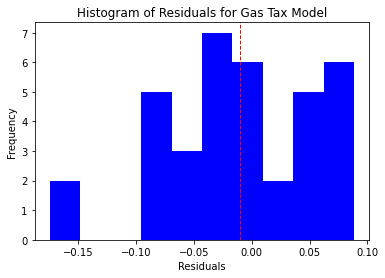

In [15]:
plt.hist(pred_df.resid, color="blue")
plt.axvline(pred_df.resid.mean(), color="red", linestyle="dashed", linewidth=1)
plt.title("Histogram of Residuals for Gas Tax Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.xlim()
plt.show()

^ The residuals also look pretty decent when we plot them. There are a couple of countries, however, were we are more than 0.1 off in our prediction. We over-predict in both of the cases. (The dashed red line is the average residual amount).

Text(0, 0.5, 'Residuals')

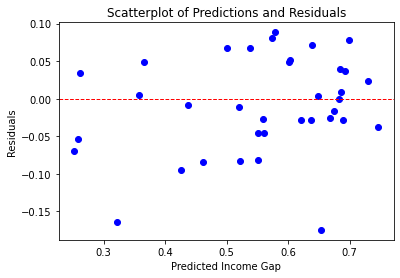

In [16]:
plt.scatter(pred_df.prediction, pred_df.resid, color="blue")
plt.axhline(0, color="red", linestyle="dashed", linewidth=1)
plt.title("Scatterplot of Predictions and Residuals")
plt.xlabel("Predicted Income Gap")
plt.ylabel("Residuals")

^ Here we can see that the two large over-predictions are at different ends of the predicted range. In general, the residuals are fairly constant across the predicted income ratio range.


We should take a closer look at the countries where there were high residuals. 

Our model does not do a good job at predicting income ratios for either Afghanistan or the Netherlands, over-predicting a fair bit in both cases. Recall that our feature selection step gave us a model with just two predictors: `laborforcepartratio` and `humandevratio`.

<details>

<summary> How to interpret the scatterplot of predictions and residuals? </summary>
    
#### Interpreting scatterplot results
    
A scatterplot of predictions and residuals is a useful tool for evaluating the performance of a regression model. The scatterplot shows the relationship between the predicted values and the residuals. The residuals are the differences between the predicted values and the actual values.

A good regression model will have a scatterplot that is randomly scattered around the line y=0. This means that the model is not systematically over- or under-predicting the values. If the scatterplot shows a pattern, such as a curved line, then it means that the model is not a good fit for the data.

Here is an example of a scatterplot of predictions and residuals:


Here are some things to look for when interpreting a scatterplot of predictions and residuals:

- **The overall shape of the scatterplot**: A good regression model will have a scatterplot that is randomly scattered around the line y=0. If the scatterplot shows a pattern, such as a curved line, then it means that the model is not a good fit for the data.
- **The spread of the residuals**: The residuals should be evenly spread around the line y=0. If the residuals are not evenly spread, then it means that the model is not a good fit for the data.
- **The presence of outliers**: Outliers are points that are far away from the rest of the data. Outliers can be caused by errors in the data or by the model not being able to fit the data well.
    
If you see any of these problems in a scatterplot of predictions and residuals, then you should consider improving the model. You can do this by changing the model parameters, adding more features to the model, or removing outliers from the data.
</details>

In [19]:
pred_df.loc[
    np.abs(pred_df.resid) >= 0.1,
    ["incomeratio", "prediction", "resid", "laborforcepartratio", "humandevratio"],
].T

country,Afghanistan,Netherlands
incomeratio,0.156802,0.478578
prediction,0.321416,0.653144
resid,-0.164614,-0.174566
laborforcepartratio,0.198742,0.828612
humandevratio,0.600733,0.946978


^ For Afghanistan, the labor force participation ratio is very near the minimum of 0.19 and the human development ratio is at the minimum. This still does not get us close to predicting the very low income ratio, which is also at the minimum.

For the Netherlands, the labor force participation ratio of 0.83 is a fair bit above the median of 0.75, but the human development ratio is right at the median. This is why our model predicts an income ratio a little above the median of 0.6. The actual income ratio for the Netherlands is, then, surprisingly low.

### Summary

We can see some advantages of KNN regression
- okay-predictions on difficult-to-model data without spending a lot of time specifying a model
- do not need transformation other than imputation and scaling
- do not need to worry about non-linearity

Disadvantages
- does not scale very well (decision trees and random forest regression can deal with this)

## Key concepts for decision tree and random forest regression

Ask Bard on this topic, then summarize your own

1. what are some key concepts for decision tree and random forest regression
2. how are they different from each other, and from KNN
3. how does decision tree/random forest regression works works

## Decision tree and random forest regression

### Setup dependencies

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree

### Import custom dependencies

In [27]:
from data.load import load_un_income
from preprocfunc import OutlierTrans

### Load data

In [30]:
un_income_gap = load_un_income()

### Exploratory data analysis

Do a `HID` which is 

- head
- info
- describe

In [31]:
un_income_gap.head()

,gdirank,genderdev,femalehumandevelopment,malehumandevelopment,femalelifeexpectancy,malelifeexpectancy,femaleexpectededucation,maleexpectededucation,femaleyearseducation,maleyearseducation,...,hdi,lifeexpectancy,expectededucation,education,incomepercapita,incomerank,incomeratio,educratio,laborforcepartratio,humandevratio
country,,,,,,,,,,,,,,,,,,,,,
Norway,1,0.996,0.940,0.944,83.6,79.5,18.2,16.8,12.7,12.5,...,0.944,81.6,17.5,12.6,64992,5,0.784621,1.016000,0.890830,0.995763
Australia,2,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,...,0.935,82.4,20.2,13.0,42261,17,0.661665,1.015504,0.818942,0.975661
Switzerland,3,0.950,0.898,0.945,85.0,80.8,15.7,15.9,11.5,13.1,...,0.930,83.0,15.8,12.8,56431,6,0.638881,0.877863,0.825100,0.950265
Denmark,4,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,...,0.923,80.2,18.7,12.7,44025,11,0.704448,1.007874,0.884036,0.976445
Netherlands,5,0.947,0.893,0.943,83.3,79.7,18.0,17.9,11.6,12.2,...,0.922,81.6,17.9,11.9,45435,9,0.478578,0.950820,0.828612,0.946978


In [32]:
un_income_gap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Norway to Niger
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gdirank                        177 non-null    int64  
 1   genderdev                      161 non-null    float64
 2   femalehumandevelopment         161 non-null    float64
 3   malehumandevelopment           161 non-null    float64
 4   femalelifeexpectancy           177 non-null    float64
 5   malelifeexpectancy             177 non-null    float64
 6   femaleexpectededucation        167 non-null    float64
 7   maleexpectededucation          167 non-null    float64
 8   femaleyearseducation           169 non-null    float64
 9   maleyearseducation             169 non-null    float64
 10  femaleincomepercapita          177 non-null    float64
 11  maleincomepercapita            177 non-null    float64
 12  giirank                        177 non-null    i

In [33]:
un_income_gap.describe()

,gdirank,genderdev,femalehumandevelopment,malehumandevelopment,femalelifeexpectancy,malelifeexpectancy,femaleexpectededucation,maleexpectededucation,femaleyearseducation,maleyearseducation,...,hdi,lifeexpectancy,expectededucation,education,incomepercapita,incomerank,incomeratio,educratio,laborforcepartratio,humandevratio
count,177.000000,161.000000,161.000000,161.000000,177.000000,177.000000,167.000000,167.000000,169.000000,169.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,169.000000,177.000000,161.000000
mean,95.045198,0.930714,0.675050,0.718075,73.392090,68.655932,13.098204,13.011377,7.746154,8.562130,...,0.690232,71.010169,12.881356,8.048588,16769.225989,0.197740,0.575324,0.863515,0.707335,0.930679
std,54.954922,0.072619,0.168321,0.145709,9.007802,8.049505,3.273230,2.490933,3.430969,2.852983,...,0.156500,8.461598,2.912755,3.145580,18553.972821,17.420286,0.161045,0.200747,0.196134,0.072604
min,1.000000,0.600000,0.287000,0.392000,48.200000,48.800000,4.800000,6.100000,0.800000,1.900000,...,0.348000,49.000000,4.100000,1.400000,581.000000,-84.000000,0.156802,0.235294,0.185695,0.600733
25%,47.000000,0.896000,0.541000,0.609000,67.000000,63.500000,10.850000,11.300000,4.900000,6.300000,...,0.555000,65.000000,11.000000,5.500000,3734.000000,-8.000000,0.496237,0.750000,0.599022,0.896040
50%,97.000000,0.950000,0.711000,0.737000,75.800000,70.400000,13.600000,13.100000,8.400000,8.600000,...,0.720000,73.100000,13.100000,8.400000,10512.000000,2.000000,0.604965,0.931818,0.753467,0.949728
75%,143.000000,0.980000,0.812000,0.835000,79.900000,74.300000,15.500000,14.750000,10.600000,10.900000,...,0.818000,76.800000,15.100000,10.800000,22762.000000,11.000000,0.688003,0.992063,0.853114,0.979647
max,188.000000,1.030000,0.940000,0.945000,86.800000,81.200000,20.700000,19.700000,13.100000,13.800000,...,0.944000,84.000000,20.200000,13.100000,123124.000000,47.000000,0.927258,1.348485,1.038037,1.030708


### Identify columns

Identify the target column, and the feature columns. Aside from that, you may want to handle different columns differently, which could be categories, numeric or special columns.

In [37]:
num_cols = [
    "educratio",
    "laborforcepartratio",
    "humandevratio",
    "genderinequality",
    "maternalmortality",
    "adolescentbirthrate",
    "femaleperparliament",
    "incomepercapita",
]
gap_sub = un_income_gap[["incomeratio"] + num_cols]

### Prepare train and test data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    gap_sub[num_cols], gap_sub["incomeratio"], test_size=0.2, random_state=0
)

### A decision tree example with interpretation

1. instantiate a decision tree regressor
    - limit the depth to three
    - require that each leaf has at least five observations
2. create a pipeline
3. preprocess data with pipeline
4. fit the decision tree regressor with the train data
5. plot the decision tree

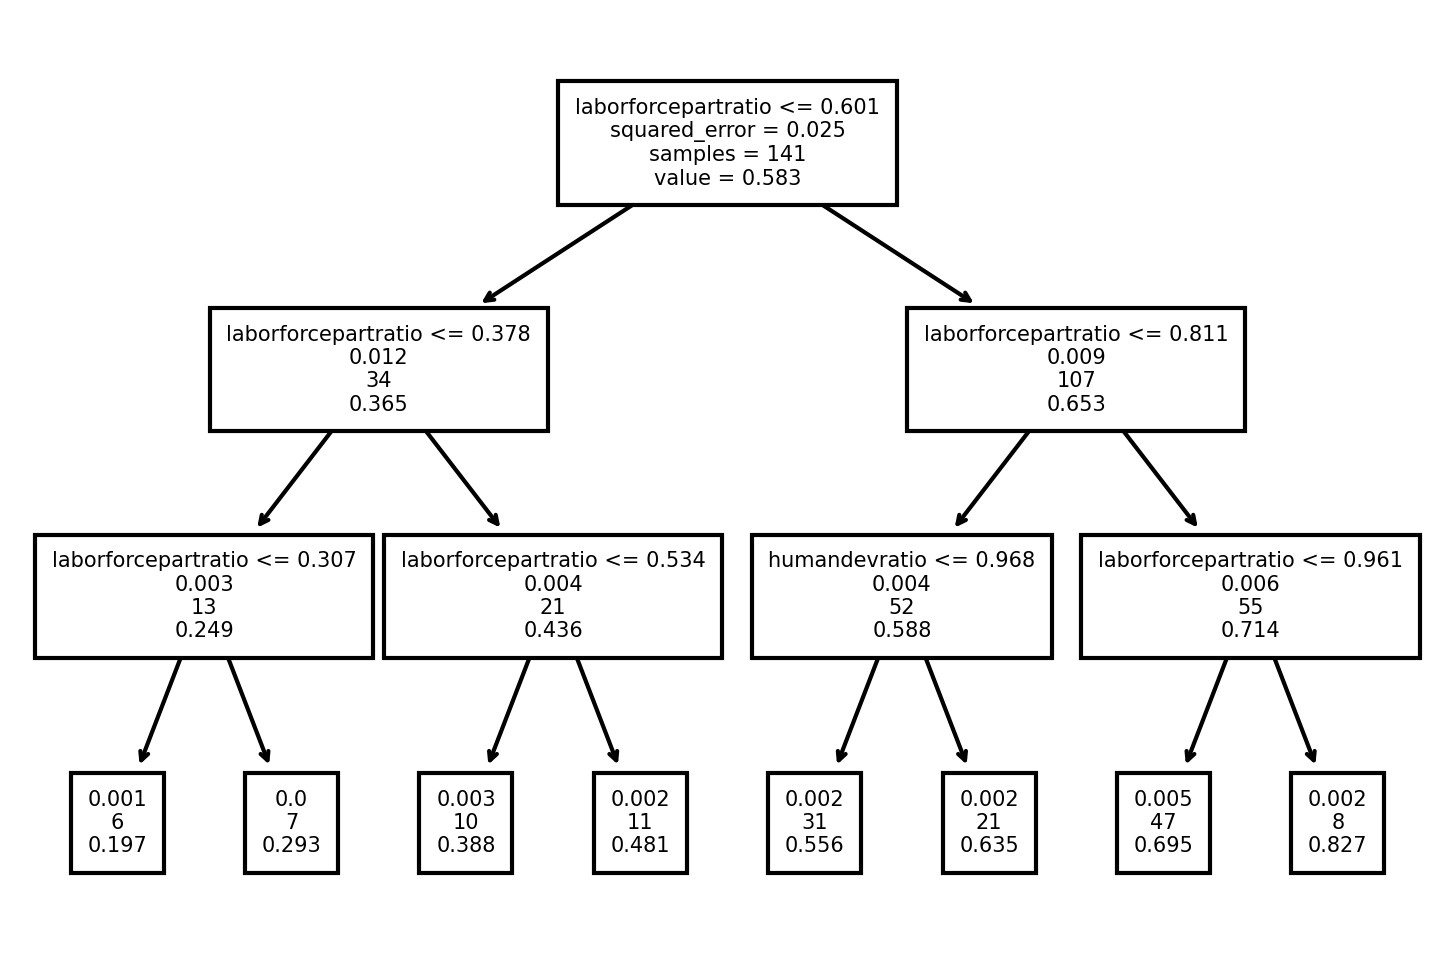

In [49]:
dtreg_example = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3)

pipe0 = make_pipeline(OutlierTrans(3), SimpleImputer(strategy="median"))
X_train_imp = pipe0.fit_transform(X_train)
dtreg_example.fit(X_train_imp, y_train)

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=300)

_ = plot_tree(dtreg_example, feature_names=X_train.columns, label="root", fontsize=5)

### Building and interpreting our actual model

1. instantiate a new decision tree regressor
2. create a pipeline that uses it
3. define hyperparameters tuning

In [50]:
dtreg = DecisionTreeRegressor()

feature_sel = SelectFromModel(LinearRegression(), threshold="0.8*mean")
pipe1 = make_pipeline(
    OutlierTrans(3), SimpleImputer(strategy="median"), feature_sel, dtreg
)

dtreg_params = {
    "decisiontreeregressor__max_depth": np.arange(2, 20),
    "decisiontreeregressor__min_samples_leaf": np.arange(5, 11),
}

4. setup randomized search

In [51]:
rs = RandomizedSearchCV(
    pipe1,
    dtreg_params,
    cv=4,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    random_state=1,
)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('outliertrans',
                                              OutlierTrans(threshold=3)),
                                             ('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('selectfrommodel',
                                              SelectFromModel(estimator=LinearRegression(),
                                                              threshold='0.8*mean')),
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor())]),
                   n_iter=20,
                   param_distributions={'decisiontreeregressor__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'decisiontreeregressor__min_samples_leaf': array([ 5,  6,  7,  8,  9, 10])},
                   random_state=1, scoring='neg_mean_absolute_error')

In [52]:
rs.best_params_

{'decisiontreeregressor__min_samples_leaf': 5,
 'decisiontreeregressor__max_depth': 11}

In [53]:
rs.best_score_

-0.052689763584596636

^ The best parameters for our decisin tree are minimum samples of 5, and a maximum depth of 11.